In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification

In [28]:
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()
X,y = digits.data, digits.target 
(X_train, X_test, 
 y_train, y_test) = train_test_split(X,y, test_size=0.3, 
                                     random_state=43)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1257, 64) (1257,)
(540, 64) (540,)


In [81]:
clf_gd = GradientBoostingClassifier(n_estimators=50, learning_rate=0.3, verbose=True, random_state=241)
print(X_train, y_train.shape)
clf_gd.fit(X_train, y_train)

[[  0.   0.  10. ...,   8.   0.   0.]
 [  0.   0.   3. ...,   0.   0.   0.]
 [  0.   0.  10. ...,  10.   0.   0.]
 ..., 
 [  0.   0.   0. ...,  12.   0.   0.]
 [  0.   0.   5. ...,   8.   0.   0.]
 [  0.   0.  11. ...,  16.  16.  10.]] (1257,)
      Iter       Train Loss   Remaining Time 
         1        1103.9261            1.84s
         2         750.7707            1.53s
         3         534.4500            1.49s
         4         383.5600            1.56s
         5         288.2775            1.45s
         6         211.8673            1.53s
         7         160.9088            1.55s
         8         125.2081            1.51s
         9          98.2648            1.49s
        10          77.1438            1.47s
        20           9.7061            1.08s
        30           1.6137            0.68s
        40           0.5301            0.31s
        50           0.4203            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=241, subsample=1.0,
              verbose=True, warm_start=False)

Эффективность составила: 96.3


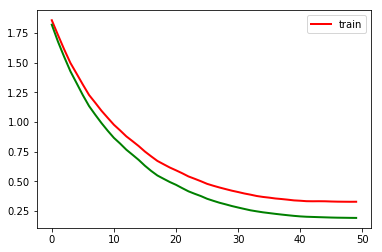

In [82]:
from sklearn.metrics import log_loss
import numpy as np
%matplotlib inline
staged  = clf_gd.staged_decision_function(X_train)
staged_test  = clf_gd.staged_decision_function(X_test)
log_loss_train = []
log_loss_test = []
for y_pred in staged:
    log_loss_train += [log_loss(y_train, 1.0/(1.0 + np.exp(-y_pred)))]
for y_pred in staged_test:
    log_loss_test += [log_loss(y_test, 1.0/(1.0 + np.exp(-y_pred)))]
    
plt.figure()
plt.plot(log_loss_test, 'r', linewidth=2)
plt.plot(log_loss_train, 'g', linewidth=2)
plt.legend(['train', 'test'])
y_pred = clf_gd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Эффективность составила: {:.4}'.format(accuracy*100))